In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns

In [2]:
files = glob.glob('../../../IRL22SU/IRL_DATA.csv')
files

['../../../IRL22SU/IRL_DATA.csv']

In [3]:
def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

In [4]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

In [5]:
num = df._get_numeric_data()
num[num < 0] = np.nan  

In [6]:
##GET RHZ CORES 
ds_grouped = df.groupby(["Type"])
ds_rz = ds_grouped.get_group("RZ")
#ds_rz = ds_grouped.get_group("PW")
ds_locs = ds_rz.groupby(["Location"])
ds_locs.groups.keys()

dict_keys(['B_point', 'SP', 'S_beach '])

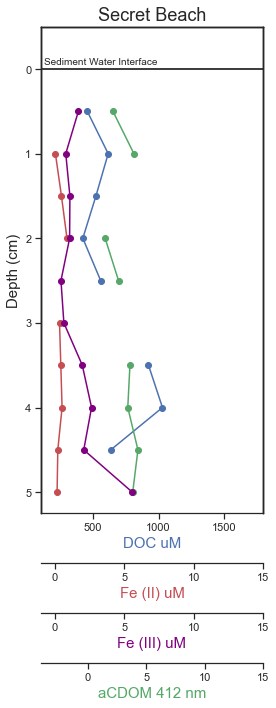

In [7]:
##PLOT RHZ CORES 

#ds = ds_rz

##Secret beach 
ds = ds_locs.get_group("S_beach ")
titel = "Secret Beach"

sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(4,10))

X = ds["NPOC_uM"] #X var 
X = np.asarray(X, dtype=float).ravel()
Y = ds['Depth'] #Y var
Y = np.asarray(Y, dtype=float).ravel()
X1 = ds['Fe2_uM'] #X var 
X1 = np.asarray(X1, dtype=float).ravel()
X2 = ds['acdom412'] #X var 
X2 = np.asarray(X2, dtype=float).ravel()
X3 = ds['Fe3_uM'] #X var 
X3 = np.asarray(X3, dtype=float).ravel()

Z = None #color

ax.plot(X, Y, 'o', ls='-', c='b')
ax.set_ylim(5.25,-.5)
ax.set_xlim(100,1800)
ax.set_xlabel("DOC uM", size = 15, c='b')
ax.set_ylabel("Depth (cm)", size = 15)
ax.set_title(titel, size = 18)
ax.axhline(y=0, color='black', linestyle='-', label='Sediment Water Interface')
ax.text(125, -.05, 'Sediment Water Interface', fontsize=10)

ax2 = ax.twiny()
ax2.plot(X1, Y,'o', ls='-', c='r')
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel('Fe (II) uM', size= 15, c='r')
min_val1 = -1
max_val1 = 15
ax2.set_xlim(min_val1,max_val1)

ax3 = ax2.twiny()
ax3.plot(X2, Y,'o', ls='-', c='g')
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 150))
ax3.set_xlabel('aCDOM 412 nm', size= 15, c='g')
min_val2 = -4
max_val2 = 15
ax3.set_xlim(min_val2,max_val2)

ax4 = ax3.twiny()
ax4.plot(X3, Y,'o', ls='-', c='purple')
ax4.set_frame_on(True)
ax4.patch.set_visible(False)
ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_label_position('bottom')
ax4.spines['bottom'].set_position(('outward', 100))
ax4.set_xlabel('Fe (III) uM', size= 15, c='purple')
min_val3 = -1
max_val3 = 15
ax4.set_xlim(min_val3,max_val3)

plt.tight_layout()

plt.savefig('../../../IRL22SU/Plots/Secret_Beach.png')

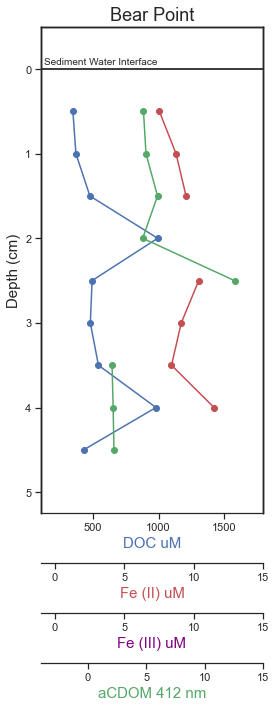

In [8]:
##PLOT RHZ CORES 

##Bear point
ds = ds_locs.get_group("B_point")
titel = "Bear Point"

sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(4,10))

X = ds["NPOC_uM"] #X var 
X = np.asarray(X, dtype=float).ravel()
Y = ds['Depth'] #Y var
Y = np.asarray(Y, dtype=float).ravel()
X1 = ds['Fe2_uM'] #X var 
X1 = np.asarray(X1, dtype=float).ravel()
X2 = ds['acdom412'] #X var 
X2 = np.asarray(X2, dtype=float).ravel()
X3 = ds['Fe3_uM'] #X var 
X3 = np.asarray(X3, dtype=float).ravel()

Z = None #color

ax.plot(X, Y, 'o', ls='-', c='b')
ax.set_ylim(5.25,-.5)
ax.set_xlim(100,1800)
ax.set_xlabel("DOC uM", size = 15, c='b')
ax.set_ylabel("Depth (cm)", size = 15)
ax.set_title(titel, size = 18)
ax.axhline(y=0, color='black', linestyle='-', label='Sediment Water Interface')
ax.text(125, -.05, 'Sediment Water Interface', fontsize=10)

ax2 = ax.twiny()
ax2.plot(X1, Y,'o', ls='-', c='r')
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel('Fe (II) uM', size= 15, c='r')
min_val1 = -1
max_val1 = 15
ax2.set_xlim(min_val1,max_val1)

ax3 = ax2.twiny()
ax3.plot(X2, Y,'o', ls='-', c='g')
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 150))
ax3.set_xlabel('aCDOM 412 nm', size= 15, c='g')
min_val2 = -4
max_val2 = 15
ax3.set_xlim(min_val2,max_val2)

ax4 = ax3.twiny()
ax4.plot(X3, Y,'o', ls='-', c='purple')
ax4.set_frame_on(True)
ax4.patch.set_visible(False)
ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_label_position('bottom')
ax4.spines['bottom'].set_position(('outward', 100))
ax4.set_xlabel('Fe (III) uM', size= 15, c='purple')
min_val3 = -1
max_val3 = 15
ax4.set_xlim(min_val3,max_val3)

plt.tight_layout()

plt.savefig('../../../IRL22SU/Plots/Bear_Point.png')

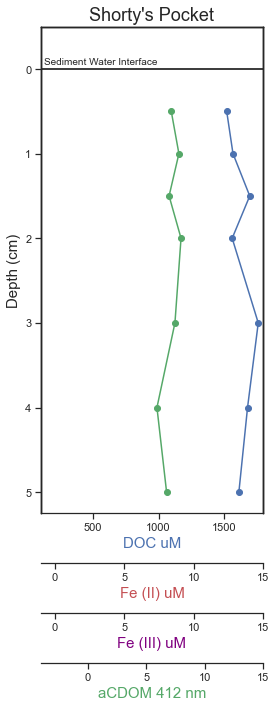

In [9]:
##PLOT RHZ CORES 

#ds = ds_rz

##Shorty's pocket RZ
ds = ds_locs.get_group("SP")
titel = "Shorty's Pocket"

##Shorty's pocket PW
#ds = ds_grouped.get_group("PW")
#titel = "Shorty's Pocket"

sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(4,10))

X = ds["NPOC_uM"] #X var 
X = np.asarray(X, dtype=float).ravel()
Y = ds['Depth'] #Y var
Y = np.asarray(Y, dtype=float).ravel()
X1 = ds['Fe2_uM'] #X var 
X1 = np.asarray(X1, dtype=float).ravel()
X2 = ds['acdom412'] #X var 
X2 = np.asarray(X2, dtype=float).ravel()
X3 = ds['Fe3_uM'] #X var 
X3 = np.asarray(X3, dtype=float).ravel()

Z = None #color

ax.plot(X, Y, 'o', ls='-', c='b')
ax.set_ylim(5.25,-.5)
ax.set_xlim(100,1800)
ax.set_xlabel("DOC uM", size = 15, c='b')
ax.set_ylabel("Depth (cm)", size = 15)
ax.set_title(titel, size = 18)
ax.axhline(y=0, color='black', linestyle='-', label='Sediment Water Interface')
ax.text(125, -.05, 'Sediment Water Interface', fontsize=10)

ax2 = ax.twiny()
ax2.plot(X1, Y,'o', ls='-', c='r')
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel('Fe (II) uM', size= 15, c='r')
min_val1 = -1
max_val1 = 15
ax2.set_xlim(min_val1,max_val1)

ax3 = ax2.twiny()
ax3.plot(X2, Y,'o', ls='-', c='g')
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 150))
ax3.set_xlabel('aCDOM 412 nm', size= 15, c='g')
min_val2 = -4
max_val2 = 15
ax3.set_xlim(min_val2,max_val2)

ax4 = ax3.twiny()
ax4.plot(X3, Y,'o', ls='-', c='purple')
ax4.set_frame_on(True)
ax4.patch.set_visible(False)
ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_label_position('bottom')
ax4.spines['bottom'].set_position(('outward', 100))
ax4.set_xlabel('Fe (III) uM', size= 15, c='purple')
min_val3 = -1
max_val3 = 15
ax4.set_xlim(min_val3,max_val3)

plt.tight_layout()

plt.savefig('../../../IRL22SU/Plots/Shorty_Pocket.png')

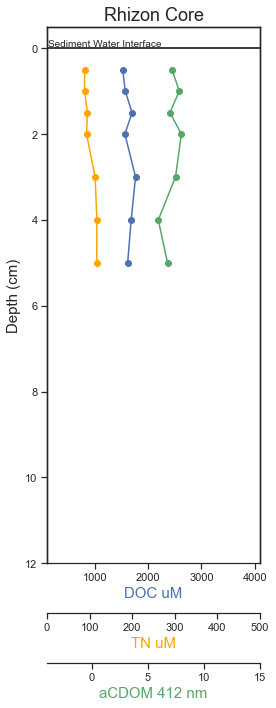

In [10]:
##GET RHZ CORES 
ds_grouped = df.groupby(["Location"])
ds_rz = ds_grouped.get_group("SP")
ds_locs = ds_rz.groupby(["Type"])
ds_locs.groups.keys()


##PLOT RHZ CORES 

#ds = ds_rz

##Shorty's pocket RZ
ds = ds_locs.get_group("RZ")
titel = "Rhizon Core"

sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(4,10))

X = ds["NPOC_uM"] #X var 
X = np.asarray(X, dtype=float).ravel()
Y = ds['Depth'] #Y var
Y = np.asarray(Y, dtype=float).ravel()
X1 = ds['TN_uM'] #X var 
X1 = np.asarray(X1, dtype=float).ravel()
X2 = ds['acdom412'] #X var 
X2 = np.asarray(X2, dtype=float).ravel()
X3 = ds['Fe3_uM'] #X var 
X3 = np.asarray(X3, dtype=float).ravel()

Z = None #color

ax.plot(X, Y, 'o', ls='-', c='b')
ax.set_ylim(12,-.5)
ax.set_xlim(100,4100)
ax.set_xlabel("DOC uM", size = 15, c='b')
ax.set_ylabel("Depth (cm)", size = 15)
ax.set_title(titel, size = 18)
ax.axhline(y=0, color='black', linestyle='-', label='Sediment Water Interface')
ax.text(125, -.05, 'Sediment Water Interface', fontsize=10)

ax2 = ax.twiny()
ax2.plot(X1, Y,'o', ls='-', c='orange')
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel('TN uM', size= 15, c='orange')
min_val1 = 0
max_val1 = 500
ax2.set_xlim(min_val1,max_val1)

ax3 = ax2.twiny()
ax3.plot(X2, Y,'o', ls='-', c='g')
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 100))
ax3.set_xlabel('aCDOM 412 nm', size= 15, c='g')
min_val2 = -4
max_val2 = 15
ax3.set_xlim(min_val2,max_val2)

plt.tight_layout()

plt.savefig('../../../IRL22SU/Plots/Shorty_Pocket_RZ.png')

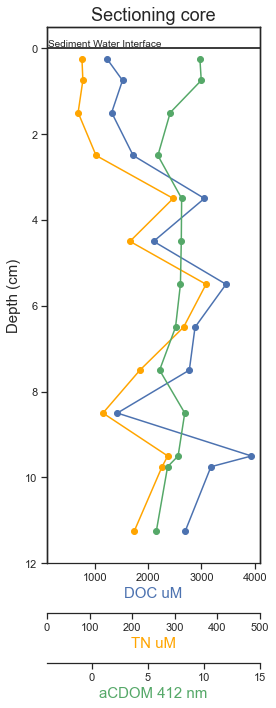

In [11]:
##GET RHZ CORES 
ds_grouped = df.groupby(["Location"])
ds_rz = ds_grouped.get_group("SP")
ds_locs = ds_rz.groupby(["Type"])
ds_locs.groups.keys()


##PLOT RHZ CORES 

#ds = ds_rz

##Shorty's pocket PW
ds = ds_locs.get_group("PW")
titel = "Sectioning core"

sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(4,10))

X = ds["NPOC_uM"] #X var 
X = np.asarray(X, dtype=float).ravel()
Y = ds['Depth'] #Y var
Y = np.asarray(Y, dtype=float).ravel()
X1 = ds['TN_uM'] #X var 
X1 = np.asarray(X1, dtype=float).ravel()
X2 = ds['acdom412'] #X var 
X2 = np.asarray(X2, dtype=float).ravel()
X3 = ds['Fe3_uM'] #X var 
X3 = np.asarray(X3, dtype=float).ravel()

Z = None #color

ax.plot(X, Y, 'o', ls='-', c='b')
ax.set_ylim(12,-.5)
ax.set_xlim(100,4100)
ax.set_xlabel("DOC uM", size = 15, c='b')
ax.set_ylabel("Depth (cm)", size = 15)
ax.set_title(titel, size = 18)
ax.axhline(y=0, color='black', linestyle='-', label='Sediment Water Interface')
ax.text(125, -.05, 'Sediment Water Interface', fontsize=10)

ax2 = ax.twiny()
ax2.plot(X1, Y,'o', ls='-', c='orange')
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel('TN uM', size= 15, c='orange')
min_val1 = 0
max_val1 = 500
ax2.set_xlim(min_val1,max_val1)

ax3 = ax2.twiny()
ax3.plot(X2, Y,'o', ls='-', c='g')
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 100))
ax3.set_xlabel('aCDOM 412 nm', size= 15, c='g')
min_val2 = -4
max_val2 = 15
ax3.set_xlim(min_val2,max_val2)

plt.tight_layout()

plt.savefig('../../../IRL22SU/Plots/Shorty_Pocket_PW.png')

In [12]:
#PART 2 

In [13]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
%matplotlib inline
import cmocean
import cmocean.cm as cmo

In [14]:
files = glob.glob('../../../IRL22SU/IRL_SHORT_DATA.csv')

def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

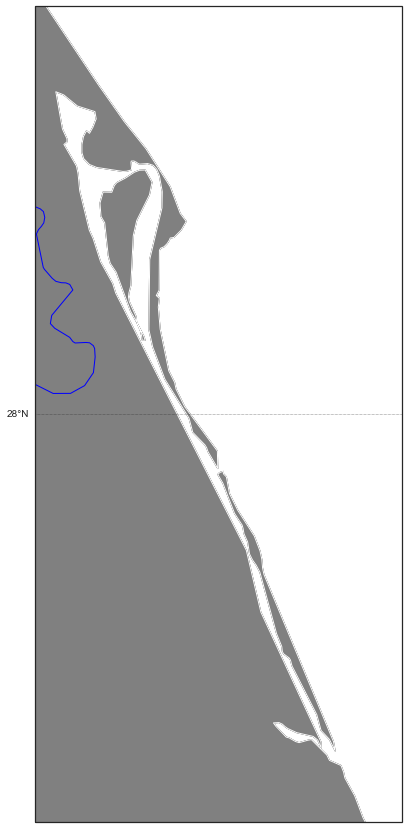

In [15]:
# Change this!
lat_top=29
lat_bot=27.0
lon_left=-80.9
lon_rigth=-80
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

#Figure

fig = plt.figure(figsize=(30,15)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

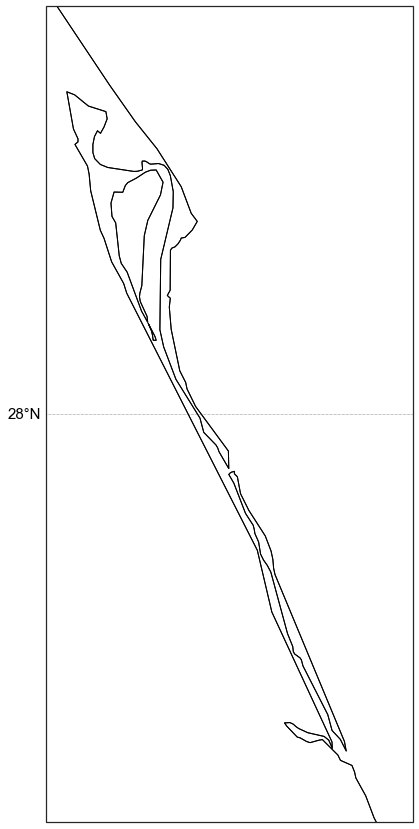

In [16]:
#making it a function

def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(30,15)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.coastlines(resolution='10m', color='black', linestyle='-', alpha=1)
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'black'}
    gl.ylabel_style = {'size': 15, 'color': 'black'}
    return fig, ax

fig, ax = plot_mapbase(extent)

In [17]:
df_grouped = df.groupby(by="CAT")

df_water = df_grouped.get_group("W")
df_mud = df_grouped.get_group("M")

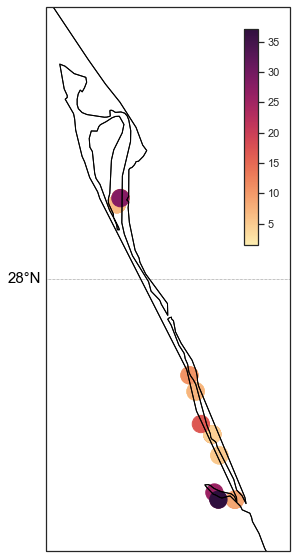

In [18]:
fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df['LON'], df['LAT'], # lon, lat variable as x,y
           c=df['acdom412'],
           #edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.565, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
#ax.text(-80.26,28.3, 'Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=10, rotation=90)
#cb.set_label('Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=10, verticalalignment='left')

fig.set_size_inches(20,10)

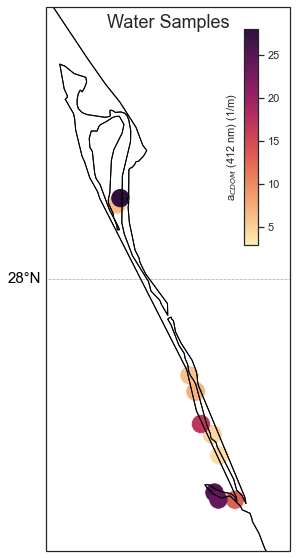

In [19]:
fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_water['LON'], df_water['LAT'], # lon, lat variable as x,y
           c=df_water['acdom412'],
           #edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.565, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
ax.text(-80.24,28.3, 'a$_{CDOM}$ (412 nm) (1/m)', size=11, rotation=90)
ax.set_title("Water Samples", size = 18, y=.95)
fig.set_size_inches(20,10)

plt.savefig('../../../IRL22SU/Plots/water_cdom_map.png')

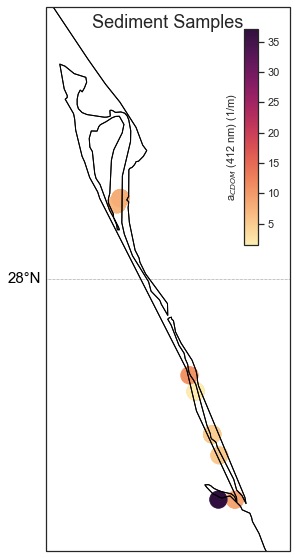

In [20]:
fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_mud['LON'], df_mud['LAT'], # lon, lat variable as x,y
           c=df_mud['acdom412'],
           #edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.565, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
ax.text(-80.24,28.3, 'a$_{CDOM}$ (412 nm) (1/m)', size=11, rotation=90)
ax.set_title("Sediment Samples", size = 18, y=.95)
fig.set_size_inches(20,10)

plt.savefig('../../../IRL22SU/Plots/mud_cdom_map.png')

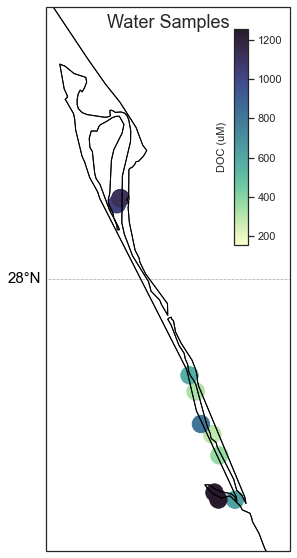

In [21]:
fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_water['LON'], df_water['LAT'], # lon, lat variable as x,y
           c=df_water['NPOC_uM'],
           #edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.deep, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.558, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
ax.text(-80.27,28.4, 'DOC (uM)', size=11, rotation=90)
ax.set_title("Water Samples", size = 18, y=.95)
fig.set_size_inches(20,10)

plt.savefig('../../../IRL22SU/Plots/water_DOC_map.png')

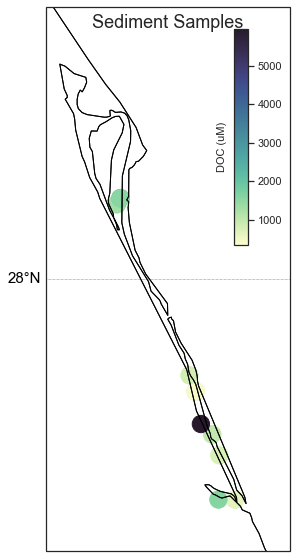

In [22]:
fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_mud['LON'], df_mud['LAT'], # lon, lat variable as x,y
           c=df_mud['NPOC_uM'],
           #edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.deep, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.558, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
ax.text(-80.27,28.4, 'DOC (uM)', size=11, rotation=90)
ax.set_title("Sediment Samples", size = 18, y=.95)
fig.set_size_inches(20,10)

plt.savefig('../../../IRL22SU/Plots/mud_DOC_map.png')

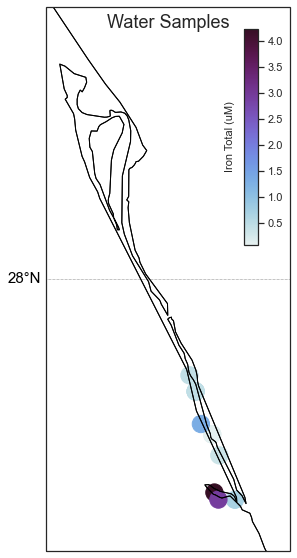

In [23]:
fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_water['LON'], df_water['LAT'], # lon, lat variable as x,y
           c=df_water['FeT_uM'],
           #edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.dense, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.565, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
ax.text(-80.24,28.4, 'Iron Total (uM)', size=11, rotation=90)
ax.set_title("Water Samples", size = 18, y=.95)
fig.set_size_inches(20,10)

plt.savefig('../../../IRL22SU/Plots/water_FeT_map.png')

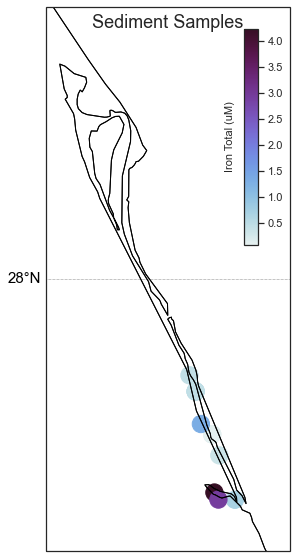

In [24]:
fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_water['LON'], df_water['LAT'], # lon, lat variable as x,y
           c=df_water['FeT_uM'],
           #edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.dense, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.565, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
ax.text(-80.24,28.4, 'Iron Total (uM)', size=11, rotation=90)
ax.set_title("Sediment Samples", size = 18, y=.95)
fig.set_size_inches(20,10)

plt.savefig('../../../IRL22SU/Plots/mud_FeT_map.png')